In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode

In [12]:
data = SparkSession.builder.getOrCreate()

In [15]:
df = data.read.json("logins.json")

In [16]:
df.head()

Row(login_time=['1970-01-01 20:13:18', '1970-01-01 20:16:10', '1970-01-01 20:16:37', '1970-01-01 20:16:36', '1970-01-01 20:26:21', '1970-01-01 20:21:41', '1970-01-01 20:12:16', '1970-01-01 20:35:47', '1970-01-01 20:35:38', '1970-01-01 20:47:52', '1970-01-01 20:26:05', '1970-01-01 20:31:03', '1970-01-01 20:34:46', '1970-01-01 20:36:34', '1970-01-01 20:39:25', '1970-01-01 20:40:37', '1970-01-01 20:34:58', '1970-01-01 20:43:59', '1970-01-01 20:47:46', '1970-01-01 20:46:34', '1970-01-01 20:56:07', '1970-01-01 20:49:12', '1970-01-01 20:59:06', '1970-01-01 20:59:59', '1970-01-01 21:15:01', '1970-01-01 21:09:24', '1970-01-01 21:19:24', '1970-01-01 21:20:53', '1970-01-01 21:29:19', '1970-01-01 21:58:05', '1970-01-01 21:51:51', '1970-01-01 21:59:40', '1970-01-01 22:08:34', '1970-01-01 22:02:51', '1970-01-01 21:58:32', '1970-01-01 22:02:31', '1970-01-01 22:05:32', '1970-01-01 22:02:46', '1970-01-01 22:10:28', '1970-01-01 22:11:58', '1970-01-01 22:01:05', '1970-01-01 22:19:10', '1970-01-01 22:16:

In [17]:
df = df.select(explode(df.login_time).alias('login_time')) #this explodes the data which will split out the array

In [18]:
df.show(20)

+-------------------+
|         login_time|
+-------------------+
|1970-01-01 20:13:18|
|1970-01-01 20:16:10|
|1970-01-01 20:16:37|
|1970-01-01 20:16:36|
|1970-01-01 20:26:21|
|1970-01-01 20:21:41|
|1970-01-01 20:12:16|
|1970-01-01 20:35:47|
|1970-01-01 20:35:38|
|1970-01-01 20:47:52|
|1970-01-01 20:26:05|
|1970-01-01 20:31:03|
|1970-01-01 20:34:46|
|1970-01-01 20:36:34|
|1970-01-01 20:39:25|
|1970-01-01 20:40:37|
|1970-01-01 20:34:58|
|1970-01-01 20:43:59|
|1970-01-01 20:47:46|
|1970-01-01 20:46:34|
+-------------------+
only showing top 20 rows



In [19]:
df = df.withColumn("login_time", df["login_time"].cast("timestamp")) #alters the column type to be timestamp

In [20]:
df.printSchema()

root
 |-- login_time: timestamp (nullable = true)



In [21]:
#EDA

In [22]:
df_view = df.createOrReplaceTempView("login_data")

In [27]:
df.show()

+-------------------+
|         login_time|
+-------------------+
|1970-01-01 20:13:18|
|1970-01-01 20:16:10|
|1970-01-01 20:16:37|
|1970-01-01 20:16:36|
|1970-01-01 20:26:21|
|1970-01-01 20:21:41|
|1970-01-01 20:12:16|
|1970-01-01 20:35:47|
|1970-01-01 20:35:38|
|1970-01-01 20:47:52|
|1970-01-01 20:26:05|
|1970-01-01 20:31:03|
|1970-01-01 20:34:46|
|1970-01-01 20:36:34|
|1970-01-01 20:39:25|
|1970-01-01 20:40:37|
|1970-01-01 20:34:58|
|1970-01-01 20:43:59|
|1970-01-01 20:47:46|
|1970-01-01 20:46:34|
+-------------------+
only showing top 20 rows



In [28]:
df_aggregate = data.sql("""
SELECT 
        CAST(FLOOR(UNIX_TIMESTAMP(login_time) / (15 * 60)) * (15 * 60) AS TIMESTAMP) AS interval,
        COUNT(*) AS count
    FROM 
        login_data
    GROUP BY 
        interval
    ORDER BY 
        interval
""")

In [29]:
df_aggregate.show()

+-------------------+-----+
|           interval|count|
+-------------------+-----+
|1970-01-01 20:00:00|    2|
|1970-01-01 20:15:00|    6|
|1970-01-01 20:30:00|    9|
|1970-01-01 20:45:00|    7|
|1970-01-01 21:00:00|    1|
|1970-01-01 21:15:00|    4|
|1970-01-01 21:45:00|    4|
|1970-01-01 22:00:00|    9|
|1970-01-01 22:15:00|    8|
|1970-01-01 22:30:00|    1|
|1970-01-01 22:45:00|    3|
|1970-01-01 23:00:00|   16|
|1970-01-01 23:15:00|   13|
|1970-01-01 23:30:00|   14|
|1970-01-01 23:45:00|   15|
|1970-01-02 00:00:00|   10|
|1970-01-02 00:15:00|   18|
|1970-01-02 00:30:00|   12|
|1970-01-02 00:45:00|   13|
|1970-01-02 01:00:00|    9|
+-------------------+-----+
only showing top 20 rows



In [30]:
import matplotlib.pyplot as plt
pandas_df = df_aggregate.toPandas()


/Users/syednewaz/anaconda3/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


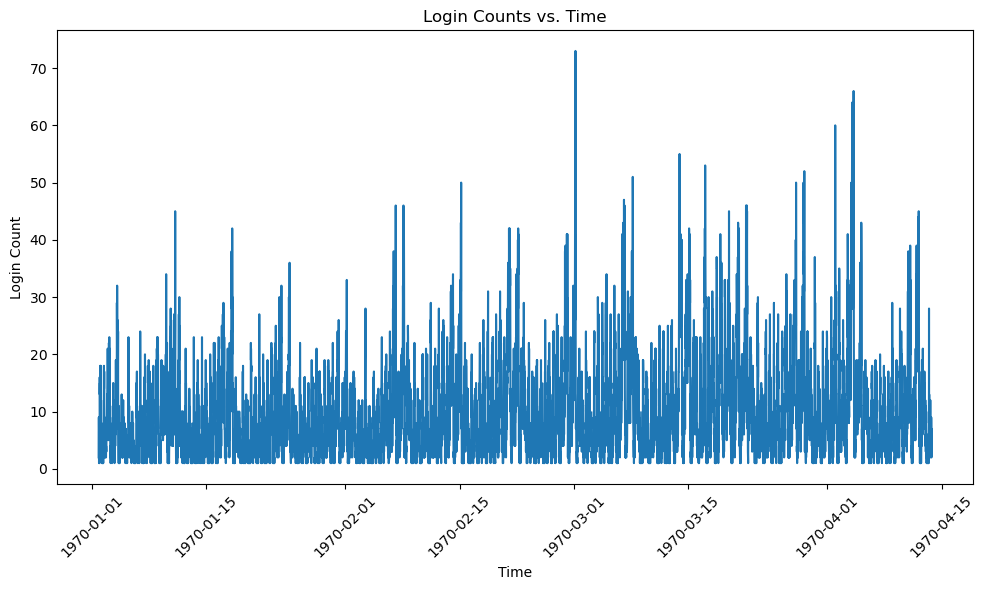

In [31]:
plt.figure(figsize=(10,6))
plt.plot(pandas_df['interval'], pandas_df['count'])
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.title('Login Counts vs. Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

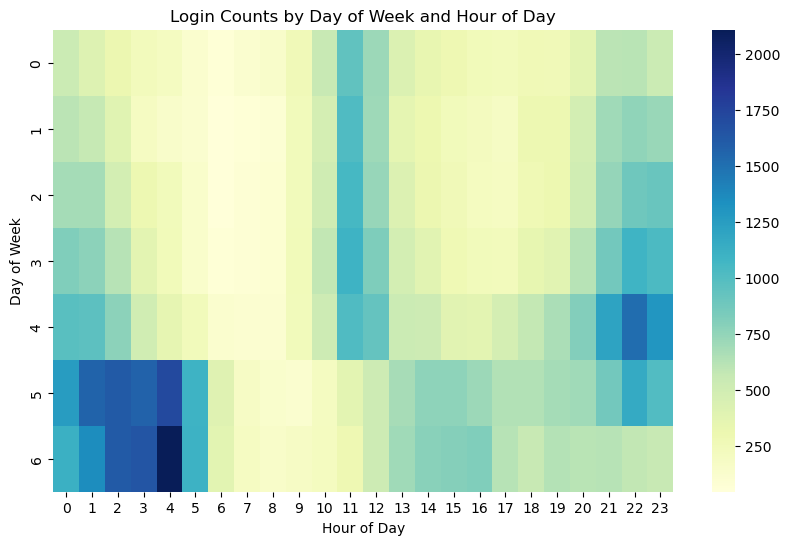

In [35]:
# Create a pivot table for the heatmap
pivot_table = pandas_df.pivot_table(values='count', index='day_of_week', columns='hour', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Login Counts by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

